In [1]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# importing machine learning models for prediction
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# Load the dataset
data = pd.read_csv('Loan_default.csv' , sep=",")

# Display the first few rows of the dataset to understand its structure
print(data.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [4]:
# List of categorical columns with their respective categories
categorical_mappings = {
    'Education': {"Bachelor's": 0, "Master's": 1, 'High School': 2, 'PhD': 3},
    'EmploymentType': {'Full-time': 0, 'Unemployed': 1, 'Self-employed': 2, 'Part-time': 3},
    'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
    'HasMortgage': {'Yes': 0, 'No': 1},
    'HasDependents': {'Yes': 0, 'No': 1},
    'LoanPurpose': {'Auto': 0, 'Business': 1, 'Other': 2, 'Home': 3, 'Education': 4},
    'HasCoSigner': {'Yes': 0, 'No': 1}
}

# Apply the mapping to the data
for column, mapping in categorical_mappings.items():
    data[column] = data[column].replace(mapping)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Show the transformed dataset
print("\nTransformed dataset:")
print(data.head())


Missing values in each column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Transformed dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1             

In [5]:
# Assuming 'data' is your DataFrame and you want to drop 'LoanID' and use 'Default' as the target variable
X = data.drop(['LoanID', 'Default'], axis=1)
y = data['Default']

X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,2,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,2,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,1,1
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,0,1


In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_train_smote, y_train_smote = oversample.fit_resample(X, y) 

In [7]:
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.20)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier with depth 2
dt = DecisionTreeClassifier(max_depth=2)
# initializing the boosting module with
model = AdaBoostClassifier(
    base_estimator=dt,
    n_estimators=600,
    learning_rate=0.01,
    random_state=42
)

In [9]:
# training the model on the train dataset
model.fit(X_train, y_train)

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=600, random_state=42)

In [10]:
# predicting the output on the test dataset
pred_final = model.predict(X_test)

In [11]:
# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

0.14022242406787921


In [12]:
from sklearn.metrics import classification_report # evaluation metric
from termcolor import colored as cl # text customization
# Classificaton report
print(cl(classification_report(y_test, pred_final), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87     45137
           1       0.89      0.82      0.85     45141

    accuracy                           0.86     90278
   macro avg       0.86      0.86      0.86     90278
weighted avg       0.86      0.86      0.86     90278



In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

for metric_name in scoring:
    metric_result = results['test_' + metric_name]
    print(f"{metric_name}: {metric_result.mean():.2f} +/- {metric_result.std():.2f}")

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy: 0.85 +/- 0.10
precision_macro: 0.86 +/- 0.07
recall_macro: 0.85 +/- 0.10
f1_macro: 0.85 +/- 0.10


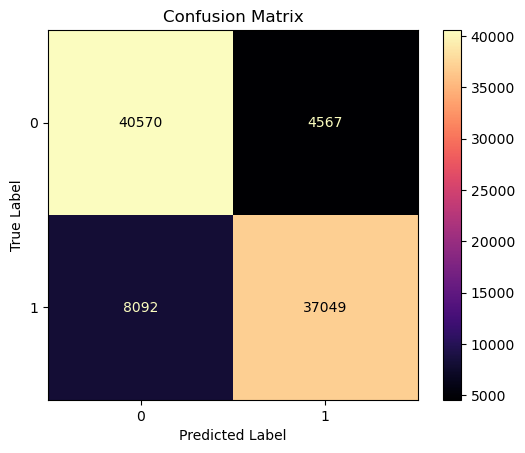

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from termcolor import colored as cl  # Text customization
# Calculate confusion matrix
cm = confusion_matrix(y_test, pred_final)

# Display the confusion matrix with a custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='magma')  # Using 'viridis' color map for better visual appeal
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
from optuna.samplers import TPESampler
from sklearn.metrics import accuracy_score
import optuna
import pickle

sampler = TPESampler(seed=1)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-19 22:06:26,249] A new study created in memory with name: no-name-1e320e43-71b8-4c9c-a50a-e48af6a154fb
[I 2024-04-19 22:07:57,625] Trial 0 finished with value: 0.8390194731828352 and parameters: {'n_estimators': 238, 'learning_rate': 0.14486833887239342}. Best is trial 0 with value: 0.8390194731828352.
[I 2024-04-19 22:08:16,884] Trial 1 finished with value: 0.6512328585037329 and parameters: {'n_estimators': 50, 'learning_rate': 0.008072307884499755}. Best is trial 0 with value: 0.8390194731828352.
[I 2024-04-19 22:09:01,351] Trial 2 finished with value: 0.6261990739715102 and parameters: {'n_estimators': 116, 'learning_rate': 0.0018924123965722254}. Best is trial 0 with value: 0.8390194731828352.
[I 2024-04-19 22:09:53,089] Trial 3 finished with value: 0.7211169941735528 and parameters: {'n_estimators': 134, 'learning_rate': 0.010881335003635882}. Best is trial 0 with value: 0.8390194731828352.
[I 2024-04-19 22:11:21,430] Trial 4 finished with value: 0.7934712776091628 and

[I 2024-04-19 23:43:46,120] Trial 41 finished with value: 0.8659806375861229 and parameters: {'n_estimators': 468, 'learning_rate': 0.9043484990230786}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-19 23:46:56,233] Trial 42 finished with value: 0.8639314118611401 and parameters: {'n_estimators': 499, 'learning_rate': 0.43271853403620875}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-19 23:49:54,945] Trial 43 finished with value: 0.8652384855668047 and parameters: {'n_estimators': 468, 'learning_rate': 0.7490402437871178}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-19 23:52:43,840] Trial 44 finished with value: 0.8633554132789827 and parameters: {'n_estimators': 443, 'learning_rate': 0.46137072759769676}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-19 23:55:45,172] Trial 45 finished with value: 0.8650280245464012 and parameters: {'n_estimators': 475, 'learning_rate': 0.7831978102081094}. Best is trial 41 with value: 0.865980

[I 2024-04-20 01:35:36,066] Trial 82 finished with value: 0.8656040231285584 and parameters: {'n_estimators': 478, 'learning_rate': 0.9826284061663599}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-20 01:38:38,415] Trial 83 finished with value: 0.8648397173176189 and parameters: {'n_estimators': 477, 'learning_rate': 0.81072485248906}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-20 01:41:29,878] Trial 84 finished with value: 0.8639757194443829 and parameters: {'n_estimators': 448, 'learning_rate': 0.5138076208186694}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-20 01:44:28,589] Trial 85 finished with value: 0.8649726400673475 and parameters: {'n_estimators': 469, 'learning_rate': 0.6806074281119879}. Best is trial 41 with value: 0.8659806375861229.
[I 2024-04-20 01:47:14,314] Trial 86 finished with value: 0.8642415649438402 and parameters: {'n_estimators': 434, 'learning_rate': 0.5923802032163028}. Best is trial 41 with value: 0.8659806375

Number of finished trials:  100
Best trial:
  Value:  0.8659806375861229
  Params: 
    n_estimators: 468
    learning_rate: 0.9043484990230786


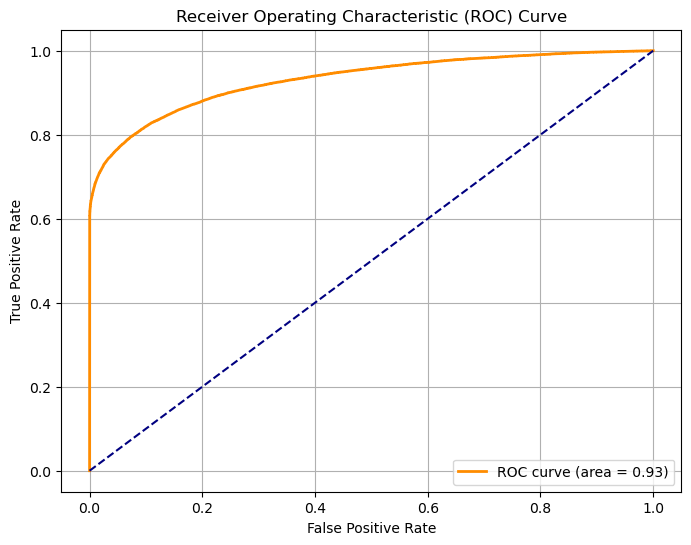

In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Calculate the AUC

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()